# Dataset Description
*heart_disease_train_dataset.csv* contains 300 training samples, consisting of 13 features and 1 target label. The first row is the header row containing the column names, for a total of 301 rows and 14 columns.

Below is the list of column names, their possible values, and the information that they represent:

Column Name                            | Variable Type | Remarks 
---------------------------------------|---------------|--------
age                                    | Integer       | double-digit integer
gender                                 | Binary        | 0 = female ; 1 = male
chest_pain_type                        | Categorical   | 0 = asymptomatic ; 1 = non-anginal pain ; 2 = atypical angina ; 3 = typical angina
resting_blood_pressure                 | Numerical     | mmHg
serum_cholesterol                      | Numerical     | mg/dl
diabetes                               | Binary        | 0 = no ; 1 = yes
left_ventricular_hypertrophy           | Binary        | 0 = no ; 1 = yes
maximum_heart_rate                     | Numerical     | maximum heart rate in beats-per-minute achieved during exercise test
exercise_induced_angina                | Binary        | 0 = no ; 1 = yes
exercise_induced_ST_depression         | Numerical     | relative to ST segment during rest as measured by electrocardiogram
ST_slope_anomaly                       | Binary        | 0 = no ; 1 = yes
number_of_major_blood_vessel_blockages | Integer       | single-digit integer, potential heart blockages as detected by flouroscopy
myocardial_defect                      | Binary        | 0 = no ; 1 = yes
heart_disease                          | Binary        | 0 = no ; 1 = yes

\
*heart_disease_test_dataset.csv* contains 300 test samples, consisting of the same 13 features and 1 target label. The first row is also the header row containing the column names, for a total of 301 rows and 14 columns. Your task is to predict the 300 target labels with the *k-Nearest Neighbors* algorithm and the 300 "neighbors" (i.e., data samples) in *heart_disease_train_dataset.csv*, and then check your accuracy against the actual target labels.

Note: For both datasets, we have already loaded them with Numpy for you, without the header row.


# Setup

## Task 0: Download Datasets

[heart_disease_train_dataset.csv](./heart_disease_train_dataset.csv), 
[heart_disease_test_dataset.csv](./heart_disease_test_dataset.csv)

## Import Numpy (Optional Task: Import Modules from Python Standard Library)

Run this code cell to import Numpy. You may also import other modules, as long as they are part of the Python Standard Library. https://docs.python.org/3/library/

You are **NOT** allowed to import any other external libraries (e.g., *sklearn*).

In [ ]:
import numpy as np

# Task 1: Standardize Dataset

Implement the function *standardize_dataset(input_array)* to standardize the values stored in *input_array* with the following formula: 

$X_{new} = \frac{X - mean}{standard\_deviation}$ 

You can assume that *input_array* is a Numpy 2D array, and each column is an independent feature, with no label column.

Hint 1: You may use Numpy's *mean()* and *std()* functions. Remember to specify *ddof=1* for Numpy's *std()*, as we need to calculate the sample standard deviation ($n-1$ as denominator) and **NOT** the population standard deviation ($n$ as denominator). \
Hint 2: You may use Numpy broadcasting by specifying the correct values for *axis* and *keepdims* in Numpy's *mean()* and *std()*.

https://numpy.org/doc/stable/reference/generated/numpy.mean.html \
https://numpy.org/doc/stable/reference/generated/numpy.std.html \
https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
def standardize_dataset(input_array):
  #TODO
  #return standardized_array

# Task 2: K-Nearest Neighbors Classifier

Since we don't expect you to have Object-Oriented Programming background, we have implemented the class-related functions for you. 

These are the class attributes of *KNNClassifer*. They can be accessed within all of the functions defined inside *KNNClassifer*: \
*self.k*: The value of *K* for *K-Nearest Neighbors Classifier*. \
*self.X_train*: The rows and feature columns of the train dataset with shape (*num_train_rows*, *num_feature_columns*). \
*self.y_train*: The rows and label column of the train dataset with shape (*num_train_rows*, ). \
\
Hint: Use Numpy broadcasting for efficient and concise code. \
https://numpy.org/doc/stable/user/basics.broadcasting.html \

Common Numpy array shape manipulation functions for your reference: \
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html \
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html \
https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html \
https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html \

https://numpy.org/doc/stable/reference/generated/numpy.zeros.html \
https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html \
https://numpy.org/doc/stable/reference/generated/numpy.ones.html \
https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html

## Task 2.1: Calculate Euclidean Distance

Implement the function *calculate_euclidean_distance(self, X_test)*. \
Return a Numpy 2D array with shape (*num_rows_test*, *num_rows_train*), containing the Euclidean Distance between each test dataset row in *X_test* across every train dataset row in *self.X_train*.

$distance(\mathbf{x^{train}}, \mathbf{x^{test}}) = \sqrt{\sum_{i=1}^{n}(x_{i}^{train} - x_{i}^{test})^2}$

Hint 1: *X_test* has shape (*num_rows_test*, *num_feature_columns*). \
Hint 2: You may use Numpy's *square()*, *sqrt()*, and *sum()* functions. \
Hint 3: Specify the correct values for *axis* and *keepdims* in *sum()* for Numpy broadcasting.

https://numpy.org/doc/stable/reference/generated/numpy.square.html \
https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html \
https://numpy.org/doc/stable/reference/generated/numpy.sum.html

## Task 2.2: Find K-Nearest Neighbor Labels

Implement the function *find_k_nearest_neighbor_labels(self, X_test)*. \
Return a Numpy 2D array with shape (*num_rows_test*, *self.k*), containing the labels of the *K-Nearest Neighbors* of *X_test*. 

Hint 1: *X_test* has shape (*num_rows_test*, *num_feature_columns*). \
Hint 2: You may call *self.calculate_euclidean_distance(X_test)* to reuse your function from Task 2.1. \
Hint 3: Numpy *argsort()* is a convenient way to get the **indices** of a sorted array. E.g., *np.argsort(np.array[5, 3, 2, 9, 1])* returns [4, 2, 1, 0, 3]. Remember to specify the correct value for *axis*. \
Hint 4: Numpy *take()* with *mode="wrap"* is a convenient way to repeatedly take values from a smaller array to generate a larger array, with supposedly out-of-bounds indices wrapping around.

https://numpy.org/doc/stable/reference/generated/numpy.argsort.html \
https://numpy.org/doc/stable/reference/generated/numpy.take.html

## Task 2.3: Predict Label

Implement the function *predict(self, X_test)*. For the sake of simplicity, you can assume that ties will never occur. \
Return the predicted labels (integer value of either 0 or 1) of *X_test* as a Numpy 2D array of shape (*num_rows_test*, ).

Hint 1: *X_test* has shape (*num_rows_test*, *num_feature_columns*). \
Hint 2: You may call *self.find_k_nearest_neighbor_labels(X_test)* to reuse your function from Task 2.2.

## Tasks 2.1 - 2.3 Code Cell:

In [ ]:
class KNNClassifier:
  def __init__(self, k):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def calculate_euclidean_distance(self, X_test):
    #TODO
    #return distances

  def find_k_nearest_neighbor_labels(self, X_test):
    #TODO
    #return labels

  def predict(self, X_test):
    #TODO
    #return y_predict

# Task 3: Scoring Metric

There are many more scoring metrics beside the accuracy score. For this assignment, we will also implement the Matthews Correlation Coefficient, an alternative version of the F1 score (used in Lab 3) specifically for binary (0 or 1) classification.

## Task 3.1: Confusion Matrix

A confusion matrix is a table that summarizes the predictions and actual labels of a binary classification. The figure below displays the names and definitions of all four prediction-vs-actual cases: True Positive, True Negative, False Positive, and False Negative.

For our implementation of *generate_confusion_matrix(y_predict, y_actual)*, we don't need to specifically create a matrix or table. It is sufficient to only calculate and return the four relevant values of *tp*, *tn*, *fp*, and *fn*.

Hint: Both *y_predict* and *y_actual* are Numpy 1D arrays with shape (*num_test_rows*, ).

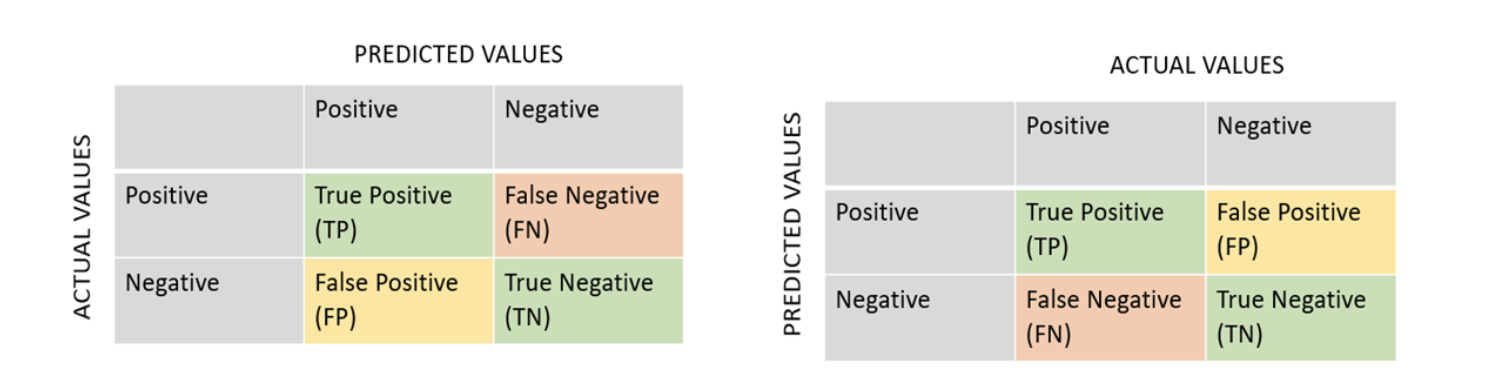


## Task 3.2: Accuracy Score

Implement *calculate_accuracy_score(y_predict, y_actual)* to return the accuracy score. \
In terms of the confusion matrix, the accuracy score formula is:

$accuracy = \frac{tp \ + \ tn}{num\_samples}$

\
Hint 1: Both *y_predict* and *y_actual* are Numpy 1D arrays with shape (*num_test_rows*, ). \
Hint 2: You may call the *generate_confusion_matrix()* function from Task 3.1.

## Task 3.3: Matthews Correlation Coefficient

Implement *calculate_MCC_score(y_predict, y_actual)* to return the MCC score. In terms of the confusion matrix, the MCC score formula is: 

$MCC = \frac{tp \times tn \ - \ fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}$

\
Hint 1: Both *y_predict* and *y_actual* are Numpy 1D arrays with shape (*num_test_rows*, ). \
Hint 2: You may call the *generate_confusion_matrix()* function from Task 3.1. \
 \

MCC is a correlation coefficient value between -1 and +1: \
+1: Perfect Prediction \
0: Average Random Prediction \
-1: Perfect Inverse Prediction \

MCC is generally regarded as a balanced measure (taking into account all four of True Positives, True Negatives, False Positives, and False Negatives) which can be used even in unbalanced datasets (ratio of 0 and 1 labels far from 50/50). MCC also solves a glaring problem in the simpler accuracy score, especially in unbalanced datasets. Take for example a testing set with 80 0-labels and 20 1-labels, a naive model that predicts all 0s will be able to achieve 80% accuracy score, but only 0 MCC score. \


https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-corrcoef

## Tasks 3.1 - 3.3 Code Cell:

In [ ]:
def generate_confusion_matrix(y_predict, y_actual):
  tp = tn = fp = fn = 0 # True Positive, True Negative, False Positive, False Negative
  #TODO
  return tp, tn, fp, fn

def calculate_accuracy_score(y_predict, y_actual):
  #TODO
  #return accuracy_score

def calculate_MCC_score(y_predict, y_actual):
  #TODO
  #return MCC_score

# Task 4: D-Fold Cross-Validation

For the sake of simplicity, we will implement our *DFoldCV* module to only handle our *KNNClassifier*, with the set of possible *K* values provided as an input tuple, and *D* provided as an input integer.

These are the class attributes of *DFoldCV*. They can be accessed within all of the functions defined inside *DFoldCV*: \
*self.X*: The rows and feature columns of the validation dataset with shape (*num_validation_rows*, *num_feature_columns*). \
*self.y*: The rows and label column of the validation dataset with shape (*num_validation_rows*, ). \
*self.k_list*: A Python list of *K* values for *K-Nearest Neighbors Classifer* to validate (find the optimal) with *D-Fold Cross-Validation*. \
*self.d*: The value of *D* for *D-Fold Cross-Validation*. \

## Task 4.1: Generate Folds

Given the value of *D*, we can split our validation dataset into *D* splits. For each of the *D* folds, the training set should be comprised of *D - 1* splits, with the testing set comprised of the leftover split. Implement *generate_folds(self)* to return the appropriate training and testing sets accordingly. For the sake of simplicity, we don't need to shuffle the dataset when generating the *D* folds.

Return requirements: \
*train_d_folds*: Python list of length *D*, with each element being a Numpy array of shape ($\frac{D-1}{D} \times$*num_validation_rows*, *num_feature_and_label_columns*). \
*test_d_folds*: Python list of length *D*, with each element being a Numpy array of shape ($\frac{1}{D} \times$*num_validation_rows*, *num_feature_and_label_columns*).

Hint: Numpy *array_split()* is a convenient function to split Numpy arrays into lists, and automatically handles uneven divisions.
https://numpy.org/doc/stable/reference/generated/numpy.array_split.html

## Task 4.2: Cross-Validate

Calculate and return the validation scores for each value of *K* in *self.k_list* across each of the *D* folds. The expected return value is a Numpy 2D array with shape (*length of self.k_list*, *D*). For the sake of simplicity, we will only validate with the MCC score.

Hint 1: You may reuse your code in Task 2, by calling *knn_model = KNNClassifier(k)* and *knn_model.func_name(parameters)*. \
Hint 2: You can also reuse your code in Task 3 by calling *calculate_MCC_score(y_predict, y_actual)*.

## Task 4.3: Validate Best K

Based on the validation scores we have calculated in Task 4.2, the overall score for each *K* is simply the average MCC score across all *D* folds. Choose and return the value of *K* with the highest overall score.

## Tasks 4.1 - 4.3 Code Cell:

In [ ]:
class DFoldCV:
  def __init__(self, X, y, k_list, d):
    self.X = X
    self.y = y
    self.k_list = k_list
    self.d = d

  def generate_folds(self):
    #TODO
    return train_d_folds, test_d_folds
  
  def cross_validate(self):
    #TODO
    #return scores

  def validate_best_k(self):
    #TODO
    #return best_k

# Optional Task: Test Run

Use all the functions we have previously defined in Tasks 1 - 4 to perform K-Nearest Neighbors with D-Folds Cross-Validation on our Heart Disease training and testing datasets. Feel free to modify this code cell for your own testing and debugging purposes, it will not be graded.

In [ ]:
if __name__ == '__main__':
  train = np.loadtxt("heart_disease_train_dataset.csv", delimiter=',', skiprows=1)
  test = np.loadtxt("heart_disease_test_dataset.csv", delimiter=',', skiprows=1)

  X_train, y_train = train[:, :-1], train[:, -1]
  X_test, y_test = test[:, :-1], test[:, -1]

  #TODO Optional